In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob


In [2]:
data=np.load('./data/data_1000_norm.npz')

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
X = data['arr_0']
y = data['arr_1']

In [5]:
X.shape, y.shape

((5450, 10000), (5450,))

In [6]:
X1 = X - X.mean(axis=0)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')


In [9]:
x_pca = pca.fit_transform(X1)

In [12]:
x_pca.shape

(5450, 5450)

In [14]:
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_cum=np.cumsum(eigen_ratio)

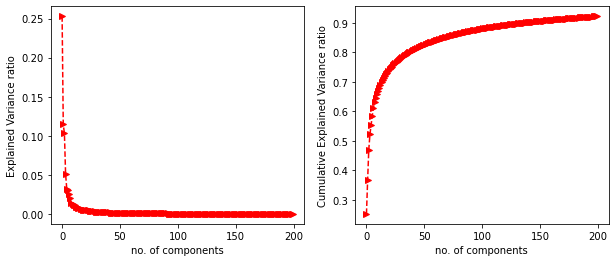

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explained Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explained Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

In [21]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [22]:
x_pca_50.shape

(5450, 50)

In [24]:
import pickle

In [25]:
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [26]:
x_pca_inv= pca_50.inverse_transform(x_pca_50)


In [27]:
x_pca_inv.shape

(5450, 10000)

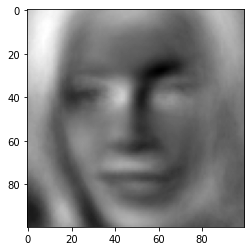

In [29]:
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

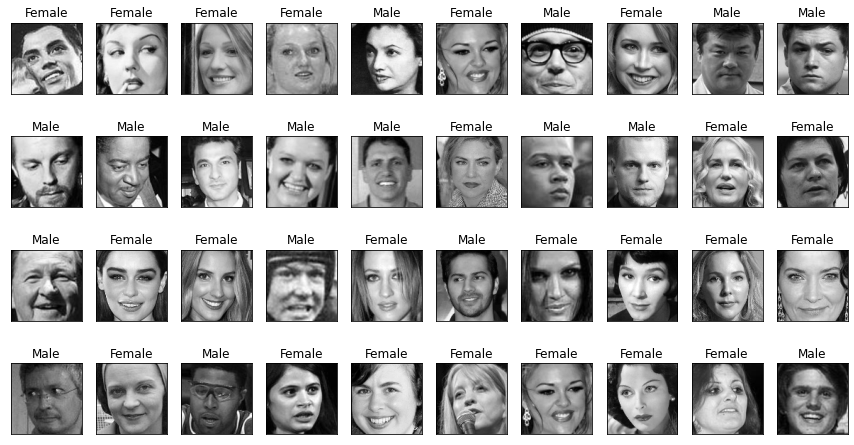

====================Eigen Images====================


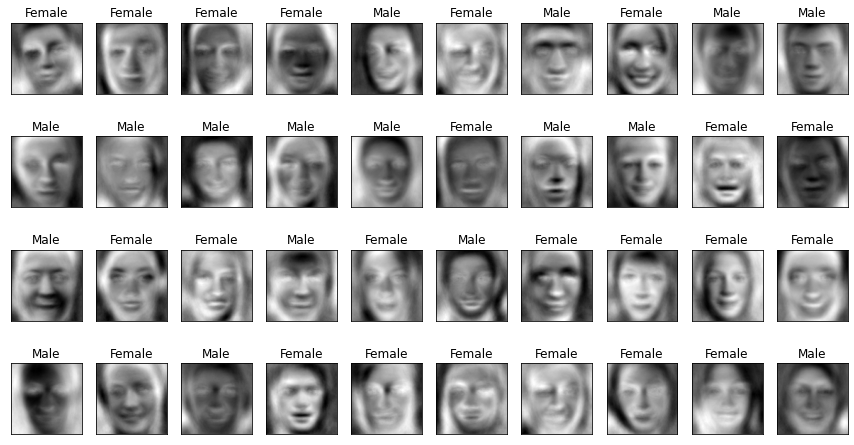

In [30]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [31]:
np.savez("./data/data_pca_50_y_mean.pickle",x_pca_50,y,X.mean(axis=0))

In [32]:
from sklearn.svm import SVC

In [33]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [36]:
model.fit(X_train,y_train)
print('model trained sucessfully')

NameError: name 'X_train' is not defined